# Rapper contingency tables

## Libraries, data, and things we did before

In [17]:
# * LIBRARIES
library(dplyr)
library(ggplot2)
library(broom)

# * LOAD IN DATA
rappers <- read.csv("../data/rappers.csv")

This chunk is adding in useful columns. *Don't worry about being able to write a function.*

In [19]:
# * DON'T WORRY ABOUT THIS PART :D
height_to_decimal <- function(this_height) {
    numeric <- sapply(strsplit(gsub("\"", "", as.character(this_height)), "\'"), as.numeric)
    numeric[1] + (numeric[2] / 12)
}
height_to_decimal <- Vectorize(height_to_decimal, vectorize.args="this_height")

# * WORRY ABOUT THIS PART
# * USING MUTATE TO ADD USEFUL VALUES
rappers <- rappers %>% mutate(height_decimal=as.numeric(height_to_decimal(height)))
rappers <- rappers %>% mutate(age=2019-birth_year,
                              active=2019-start_year)
head(rappers)

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal,age,active
Nicki-Minaj,Onika-Maraj,1982,New-York,75,2004,FALSE,"5'2""",5.166667,37,15
Jay-Z,Shawn-Carter,1969,New-York,900,1986,FALSE,"6'2""",6.166667,50,33
Eminem,Marshall-Mathers,1972,Missouri,190,1988,FALSE,"5'8""",5.666667,47,31
Kendrick-Lamar,Kendrick-Duckworth,1987,California,45,2003,FALSE,"5'6""",5.500000,32,16
Logic,Robert-Hall,1990,Maryland,10,2009,FALSE,"5'9""",5.750000,29,10
E-40,Earl-Stevens,1967,California,10,1986,FALSE,"6'1""",6.083333,52,33


## Working the categorical data

I'm going to make a **contingency table** or a **two-way** table.

In [26]:
library(dplyr)

In [44]:
cat_subset <- rappers %>% filter(origin %in% c("New-York", "California")) %>% select(artist_name, origin, active)
cat_subset <- cat_subset %>% mutate(vet=active>mean(active))
head(cat_subset)

artist_name,origin,active,vet
Nicki-Minaj,New-York,15,FALSE
Jay-Z,New-York,33,TRUE
Kendrick-Lamar,California,16,FALSE
E-40,California,33,TRUE
Nas,New-York,28,TRUE
Jadakiss,New-York,28,TRUE


In [51]:
contingency_table <- table(as.character(cat_subset$origin), cat_subset$vet)
contingency_table

            
             FALSE TRUE
  California     6   10
  New-York      10   12

We can visualize categorical variables by making a **dodged bar plot**.

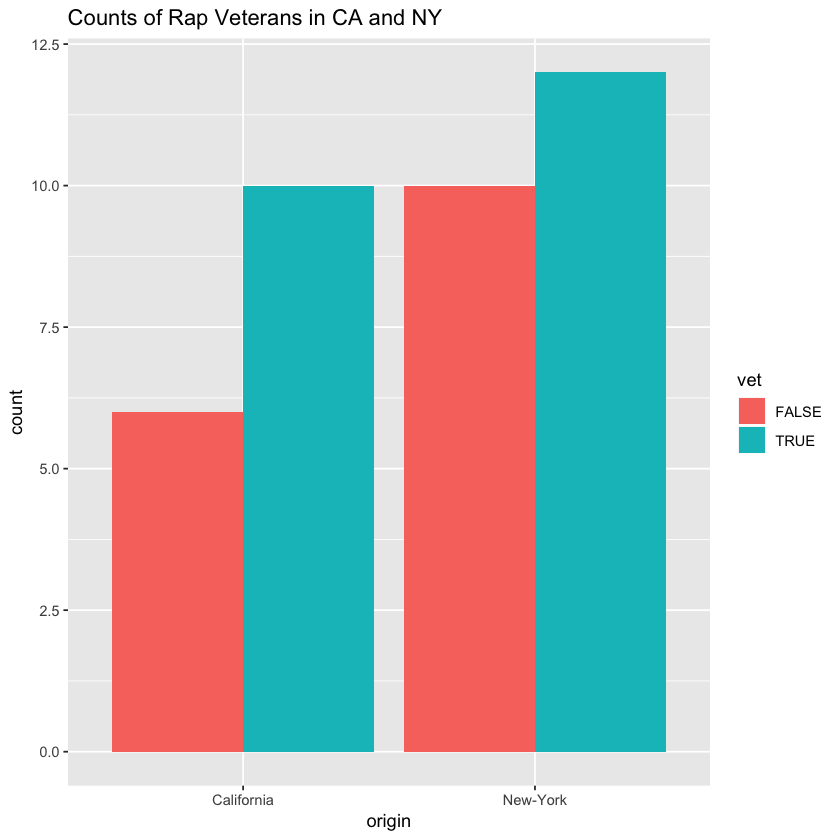

In [58]:
ggplot(cat_subset, aes(x=origin, fill=vet)) +
    geom_bar(position="dodge") +
    ggtitle("Counts of Rap Veterans in CA and NY")

## Calculating distributions
Let's think. **What is the conditional distribution of California given that the rapper is a veteran of rap (if you haven't been reading, this has been defined as the rapper has been active longer than the median amount of active time)?**